In [21]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, r2_score, recall_score, f1_score
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import keras
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Concatenate, Flatten
from sklearn.model_selection import LeaveOneOut,KFold

In [2]:
array1 = np.load('train_wave_npy1.npy', allow_pickle = True)
array2 = np.load('train_wave_npy2.npy', allow_pickle = True)
array3 = np.load('train_wave_npy3.npy', allow_pickle = True)
array4 = np.load('train_wave_npy4.npy', allow_pickle = True)
array5 = np.load('train_wave_npy5.npy', allow_pickle = True)
array6 = np.load('train_wave_npy6.npy', allow_pickle = True)

X_test = np.load('X_test.npy', allow_pickle = True)
y_test = np.load('y_test.npy', allow_pickle = True)

In [3]:
# Combine all arrays into 1 
array = np.concatenate((array1,array2,array3,array4,array5,array6))
array.shape

(197, 7)

In [4]:
X = []
y = []

In [5]:
for x in array:
    result = []
    rs = np.array(x[0][0:40])
    ls = np.array(x[1][0:40])
    re = np.array(x[2][0:40])
    le = np.array(x[3][0:40])
    rw = np.array(x[4][0:40])
    lw = np.array(x[5][0:40])
    result.append(rs)
    result.append(ls)
    result.append(re)
    result.append(le)
    result.append(rw)
    result.append(lw)
    X.append(result)
    y.append(x[6])

In [6]:
for x in array:
    result = []
    rs = np.array(x[0][40:80])
    ls = np.array(x[1][40:80])
    re = np.array(x[2][40:80])
    le = np.array(x[3][40:80])
    rw = np.array(x[4][40:80])
    lw = np.array(x[5][40:80])
    result.append(rs)
    result.append(ls)
    result.append(re)
    result.append(le)
    result.append(rw)
    result.append(lw)
    X.append(result)
    y.append(x[6])

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
X.shape

(394, 6, 40)

In [9]:
X = X.reshape(X.shape[0], 1, 6, X.shape[2])

In [10]:
X.shape

(394, 1, 6, 40)

In [11]:
# Split the dataset into train and test data set  
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle = True)

In [12]:
# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(1, 6, 40)))
model.add(Dense(256, input_shape=(1, 6, 40), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X, y,validation_split=0.33, epochs=100, batch_size=25, verbose=False)

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


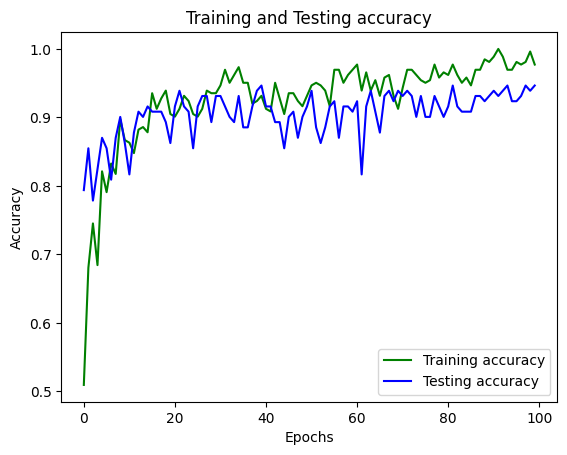

In [16]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

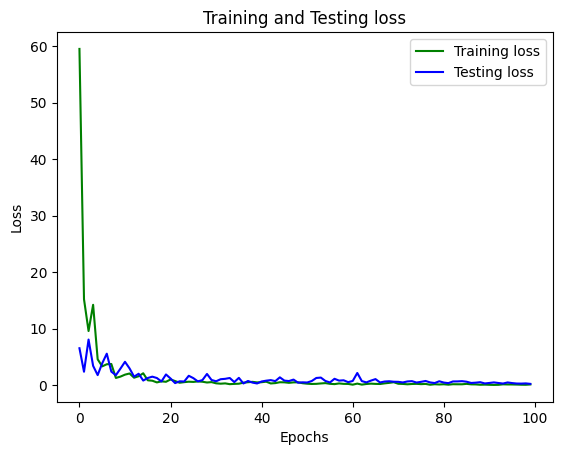

In [17]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy: {:5.2f}%".format(100 * acc))
print("Loss: {:5.2f}%".format(100 * loss))

Accuracy: 98.32%
Loss: 11.53%


In [24]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
for x in array:
    result = []
    rs = np.array(x[0][0:40])
    ls = np.array(x[1][0:40])
    re = np.array(x[2][0:40])
    le = np.array(x[3][0:40])
    rw = np.array(x[4][0:40])
    lw = np.array(x[5][0:40])
    result.append(rs)
    result.append(ls)
    result.append(re)
    result.append(le)
    result.append(rw)
    result.append(lw)
    X.append(result)
    y.append(x[6])

In [30]:
pred = []

In [31]:
for x in predictions:
  if x >= 0.8:
    pred.append(1)
  else:
    pred.append(0)


In [33]:
cm = confusion_matrix(y_test, pred)

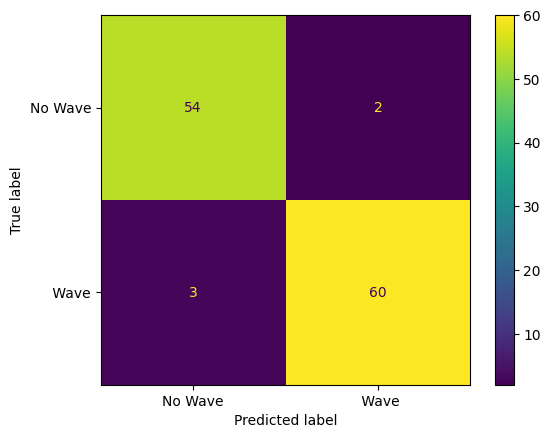

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['No Wave',' Wave'])
disp.plot()
plt.show()

In [19]:
#save model and architecture to single file
model.save("model_nn_40pt_v9.h5")
from google.colab import files 
files.download('model_nn_40pt_v9.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>